# Task 3a Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
#Conversion dictionary for signal into flux
nJy_to_es = {'f435w': 0.005171303179169625, 'f606w': 0.011015393095414123, 'f775w': 0.005142804319487919, 'f850lp': 0.0024366884234595892, 'f105w': 0.008863392873279346, 'f125w': 0.008550667128846823, 'f140w': 0.010490592077764458, 'f160w': 0.006582638416409025}

In [3]:
filters = ['f435w','f606w', 'f775w','f850lp', 'f105w','f125w','f140w','f160w']

In [4]:
cat = pickle.load(open('data/cat.p', 'rb'))  # read in signal catalogue created in task 2f

In [5]:
fluxes = {f: cat[f'{f}_signal']/nJy_to_es[f] for f in filters} # convert to flux/nJy
errors = {f: cat[f'{f}_noise']/nJy_to_es[f] for f in filters}

In [6]:
r1 = fluxes['f105w']/fluxes['f125w'] # break colour (mag) - usually on y-axis
r2 = fluxes['f850lp']/fluxes['f105w'] # slope colour (mag) - usually on x-axis

In [7]:
r1_errors = np.sqrt((r1**2)*((errors['f105w']**2/fluxes['f105w']**2)+(errors['f125w']**2/fluxes['f125w']**2)))  #add uncertainties using error propagation
r2_errors = np.sqrt((r2**2)*((errors['f850lp']**2/fluxes['f850lp']**2)+(errors['f105w']**2/fluxes['f105w']**2)))

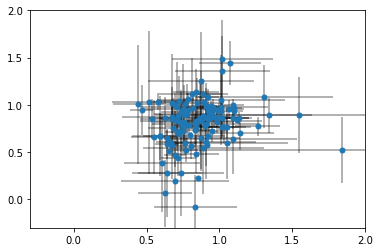

<Figure size 432x288 with 0 Axes>

In [8]:
#Plot all objects
markers,caps,bars = plt.errorbar(r1, r2, xerr = r1_errors, yerr = r2_errors, fmt='o',markersize = 5, ecolor='black')
[bar.set_alpha(0.4) for bar in bars]
plt.xlim([-0.3,2])
plt.ylim([-0.3,2])
plt.show()
plt.savefig('figures/3a.pdf')